# Let's train a Music Recommender by training a Word2Vec with a Wikipedia Rock Music Corpus

*What is word2vec? Well, it's a training algorithm to create a model that provides word embeddings - it is very similar to GLOVE which Raymond presented before me*

So the idea here is to exploit word2vecs ability to understand the context of a word and create a music recommender by training a Word2Vec on the Rock genre of wikipedia. We want to find out which bands are most "semantically" similar to others.
We're going to use a tool called Gensim which is THE tool for creating word2vec embeddings

Things we need:
- A dictionary of bands so that we can correctly tokenize multiword bands
- A set of files scraped off wikipedia. The entire rock genre has been scraped
- A set of stopwords to be removed from our wikipedia snippets since they add no value. This would be words like "a" and "the"

Let's have a peek at the dictionary

And check out one of wikipedia scrapes

In [ ]:
3. And the stop word list

## Now here is the training...


In [33]:
import wiki_rock_train

wiki_rock_train.train_and_save('data/wiki_rock_multiword_dic.txt', 
                               'data/stop-words-english1.txt',
                               'data/wiki_rock_corpus/*.txt')

- the multiword dictionary is used to enable entire band names and artist names to be treated as single words
- the stop words are words the should be removed from the corpus
- and the wiki_rock_corpus is a folder FILLED with scrapped data 

Okay okay, yes there is more too it than that... Let me go onto the code to show you the details...

## Time to play...

### Let's check how large our w2v model is.

In [14]:
import os
print os.path.getsize('data/rock_music.w2v')

18830915


### Loading up our newly trained corpus...

In [1]:
import gensim

word_sim = gensim.models.Word2Vec.load('data/rock_music.w2v')
print 'Done loading...'

Using gpu device 0: GeForce 840M (CNMeM is enabled with initial size: 75.0% of memory, cuDNN 5005)


Done loading...


### Let's create and have a good look at one of these word vectors

Size of word embedding...
100


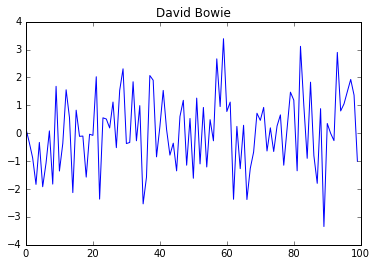

In [16]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

print "Size of word embedding..."
print len(word_sim['David Bowie'])

band = 'David Bowie'
vector = word_sim[band]
x = range(0,len(vector))
plt.plot(x, vector)
plt.title(band)
plt.show()


### We can use gensim to calculate a very simplistic cosine similarity

In [5]:
import pprint 

# Using cosine distance
print "Similar to Joy Division..\n"
pprint.pprint(word_sim.most_similar(positive=['Joy Division'], topn=10))

print "\nSimilar to Lady Gaga...\n"
pprint.pprint(word_sim.most_similar(positive=['Lady Gaga'], topn=10))

print "\nSimilar to Queen...\n"
pprint.pprint(word_sim.most_similar(positive=['Queen'], topn=10))

Similar to Joy Division..

[(u'New Order', 0.764636754989624),
 (u'Siouxsie and the Banshees', 0.7643281817436218),
 (u'My Bloody Valentine', 0.7486330270767212),
 (u'Gang of Four', 0.7396107912063599),
 (u'Ian Curtis', 0.7237499356269836),
 (u'The Velvet Underground', 0.7119016647338867),
 (u'The Clash', 0.7081732153892517),
 (u'The Cure', 0.7044165134429932),
 (u'Pink Floyd', 0.6904392242431641),
 (u'The Smiths', 0.6889955997467041)]

Similar to Lady Gaga...

[(u'Katy Perry', 0.8736884593963623),
 (u'Beyonc\xe9', 0.8673701286315918),
 (u'Alicia Keys', 0.8475775718688965),
 (u'Christina Aguilera', 0.8451395034790039),
 (u'John Legend', 0.835701584815979),
 (u'Leona Lewis', 0.8337379097938538),
 (u'Justin Bieber', 0.8268237113952637),
 (u'Jennifer Lopez', 0.8213231563568115),
 (u'Rihanna', 0.8186976909637451),
 (u'Mariah Carey', 0.816741943359375)]

Similar to Queen...

[(u'Freddie Mercury', 0.6558103561401367),
 (u'Birthday', 0.6491392850875854),
 (u'Bohemian Rhapsody', 0.612696230411

In [6]:
pprint.pprint(word_sim.most_similar(positive=['drug'], topn=10))


[(u'alcohol', 0.8787972927093506),
 (u'heroin', 0.8585001230239868),
 (u'cocaine', 0.8298882246017456),
 (u'drugs', 0.8194409608840942),
 (u'addiction', 0.8181716203689575),
 (u'prescription', 0.8039490580558777),
 (u'narcotics', 0.7964029908180237),
 (u'substance', 0.7952165007591248),
 (u'addictions', 0.7886688709259033),
 (u'alcoholism', 0.7865278124809265)]


In [7]:
pprint.pprint(word_sim.most_similar(positive=['New York'], topn=10))
pprint.pprint(word_sim.most_similar(positive=['London'], topn=10))

[(u'NY', 0.7279260158538818),
 (u'Los Angeles', 0.6773889064788818),
 (u'NYC', 0.6757597923278809),
 (u'Gerde', 0.6612169742584229),
 (u'Manhattan', 0.6515415906906128),
 (u'The Bay', 0.6393393874168396),
 (u'Arkham', 0.6365764141082764),
 (u'San Francisco', 0.6317269802093506),
 (u'Boyne', 0.6308050155639648),
 (u'Para\xf1aque', 0.6225646734237671)]
[(u'Manchester', 0.8001685738563538),
 (u'Liverpool', 0.7709138989448547),
 (u'Glasgow', 0.7367475032806396),
 (u'England', 0.7253307104110718),
 (u'Dublin', 0.7002424001693726),
 (u'Sheffield', 0.6764413714408875),
 (u'Brighton', 0.672342836856842),
 (u'Bristol', 0.655327558517456),
 (u'Birmingham', 0.6515960693359375),
 (u'Edinburgh', 0.6412298679351807)]
